<a href="https://colab.research.google.com/github/remussamoila/Loan-Approval-Prediction---New-York---2025/blob/main/notebooks/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/data/train.csv", low_memory=False)
test = pd.read_csv("/content/drive/MyDrive/data/test_nolabel.csv")

train.head()

,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Accept
0,b353a0b461c,3354343008,"TOGETHER GARGOYLES, INC.",BROOKLYN,NY,JPMORGAN CHASE BANK NATL ASSOC,NY,21-Dec-88,1989,20,...,0,0,0,0,N,N,30-Apr-89,"$350,000.00",$0.00,1
1,cca24bbcc48,2349745003,LAWRENCE K. ALTHISER DBA LARRY,HARTWICK,NY,CITIZENS BANK NATL ASSOC,RI,23-Mar-07,2007,3,...,1,4,0,2,N,N,30-Apr-07,"$35,000.00",$0.00,1
2,e60644381ce,6007284009,TAAMEER CONSTRUCTION INC,BROOKLYN (BOROUGH OF NEW YORK),NY,JPMORGAN CHASE BANK NATL ASSOC,IL,9-Jan-03,2003,5,...,0,5,1,1,0,N,31-Jan-03,"$50,000.00",$0.00,1
3,ffca41a2760,6047703002,"CENTRAL CONTROL SYSTEMS, INC.",SYRACUSE,NY,MANUFACTURERS & TRADERS TR CO,NY,10-Nov-93,1994,25,...,0,0,1,0,N,N,31-Jan-94,"$190,000.00",$0.00,1
4,79e48255003,6590164004,METRO SALON,ROCHESTER,NY,MANUFACTURERS & TRADERS TR CO,NY,14-Aug-03,2003,6,...,0,0,1,1,0,Y,30-Sep-03,"$30,000.00",$0.00,1


<ipython-input-24-3044a17446d9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Accept', palette='Set2')


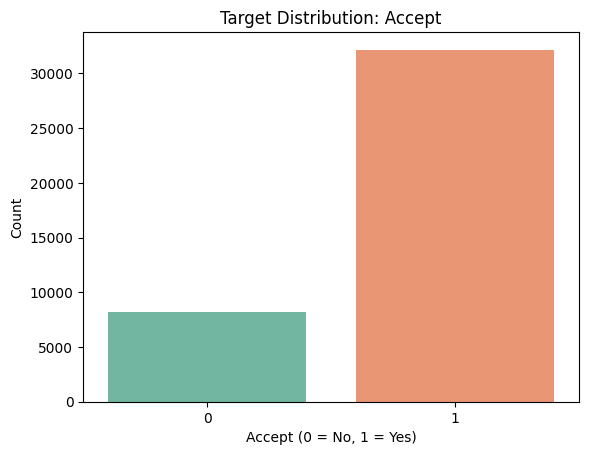

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train, x='Accept', palette='Set2')
plt.title('Target Distribution: Accept')
plt.xlabel('Accept (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


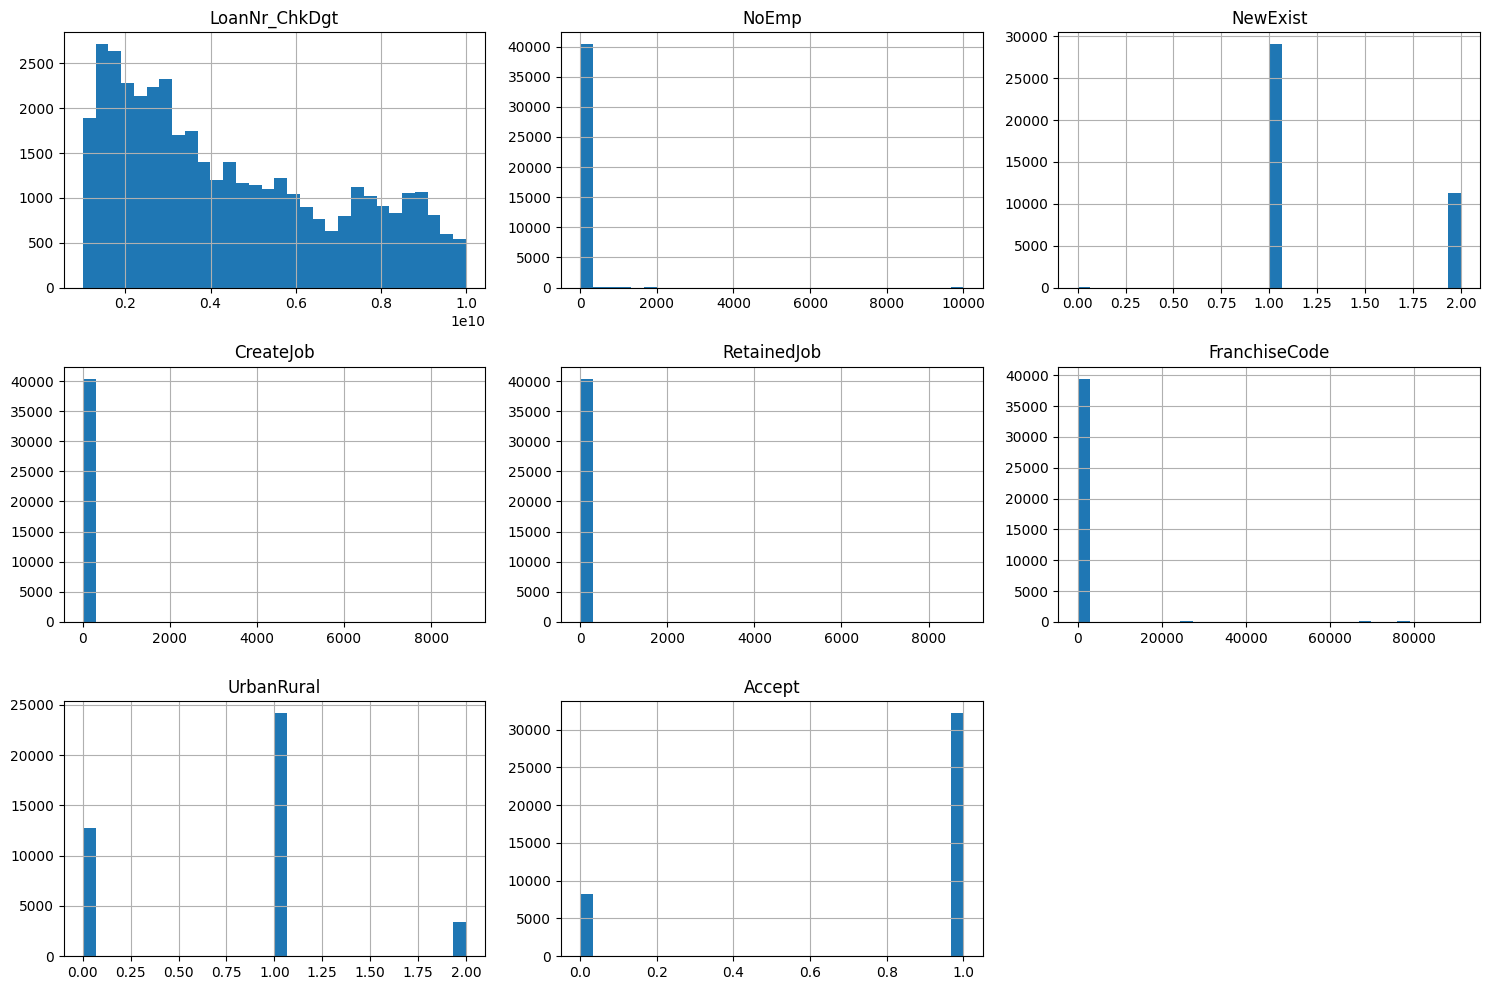

In [ ]:

numerical_features = train.select_dtypes(include=['int64', 'float64']).columns

train[numerical_features].hist(bins=30, figsize=(15, 10), layout=(len(numerical_features)//3 + 1, 3))
plt.tight_layout()
plt.show()


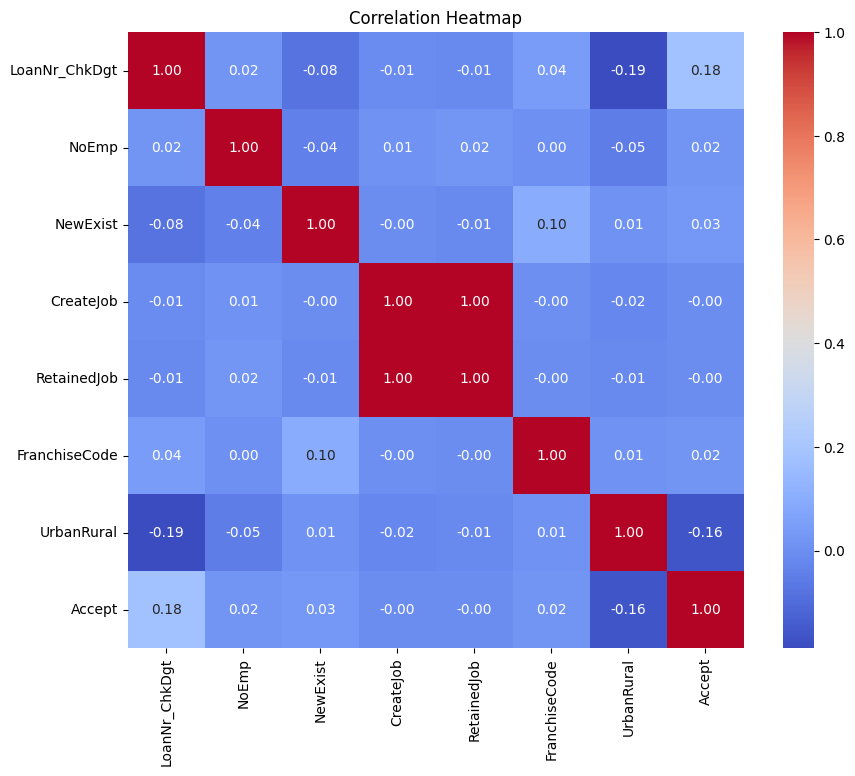

Correlation with 'Accept':
 Accept           1.000000
LoanNr_ChkDgt    0.180113
NewExist         0.026183
NoEmp            0.020537
FranchiseCode    0.017093
CreateJob       -0.004231
RetainedJob     -0.004950
UrbanRural      -0.163045
Name: Accept, dtype: float64


In [ ]:

corr = train.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

accept_corr = corr['Accept'].sort_values(ascending=False)
print("Correlation with 'Accept':\n", accept_corr)


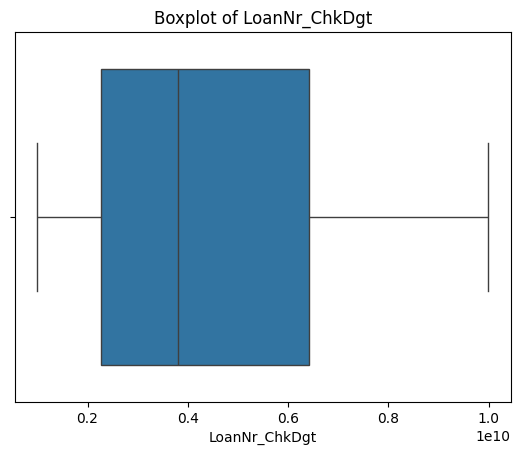

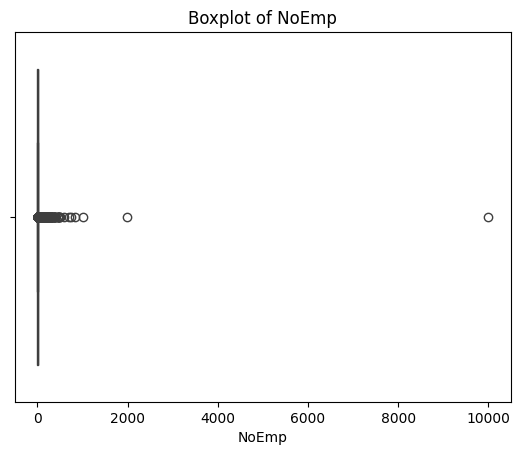

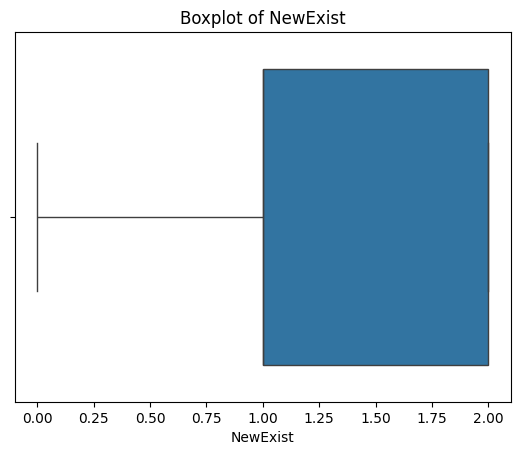

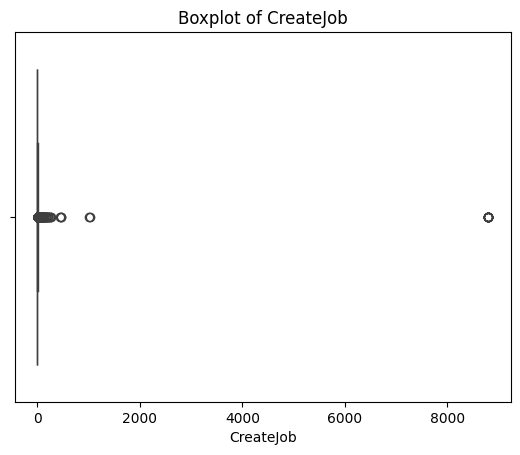

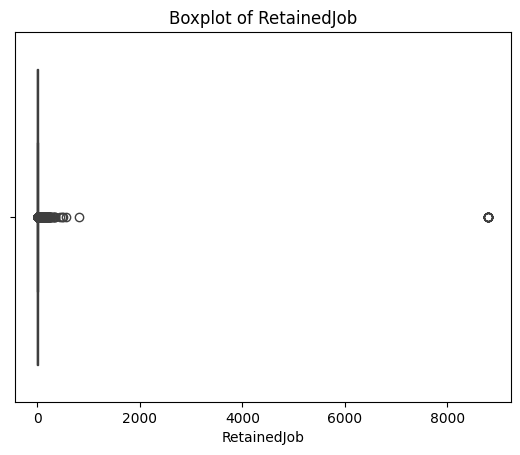

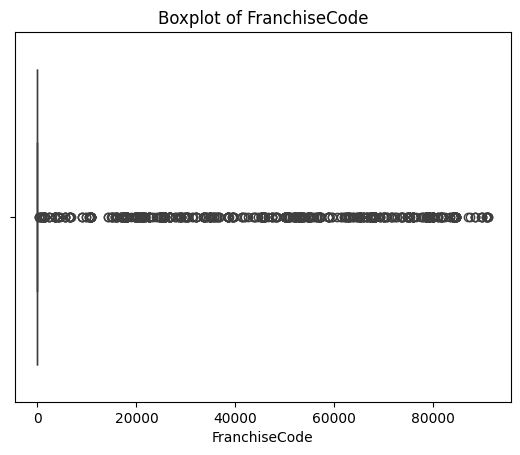

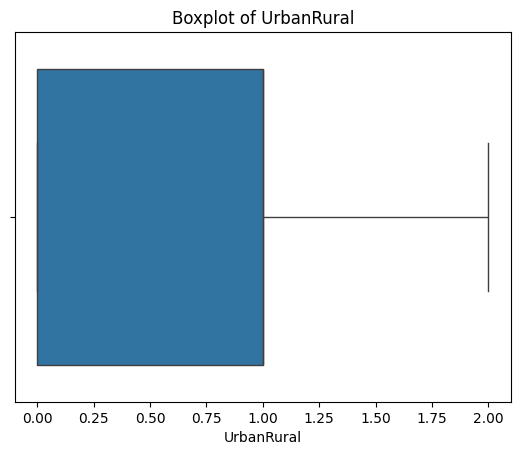

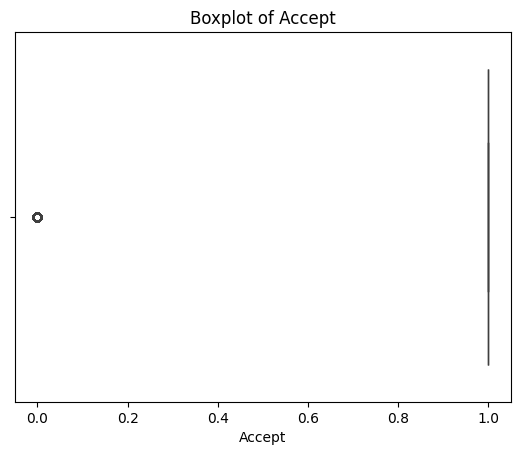

Number of outliers detected: 796


In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical features
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns

# Boxplots for each numerical feature
for col in numerical_features:
    plt.figure()
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Z-score method to detect outliers
z_scores = np.abs(stats.zscore(train[numerical_features].dropna()))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")
